In [1]:
import sys
# !{sys.executable} -m pip install spacy
# !{sys.executable} -m pip install pyldavis
# !{sys.executable} -m spacy download en
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install biopython
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install tensorflow
# !{sys.executable} -m pip install imblearn
# !{sys.executable} -m pip install sklearn
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install xgboost
# !{sys.executable} -m pip install pyod
# !{sys.executable} -m pip install lightgbm
# !{sys.executable} -m pip install catboost 
# !{sys.executable} -m pip install plotly
# !{sys.executable} -m pip install cufflinks
# !{sys.executable} -m pip install pyclustering
# !{sys.executable} -m pip install beautifulsoup4
# !{sys.executable} -m pip install algorithmia
# !{sys.executable} -m pip install paramiko
!{sys.executable} -m pip install gensim==3.8.3

In [2]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim import models
from gensim.models import LdaModel, CoherenceModel
from gensim.models.wrappers import LdaMallet
import pprint

# spacy for lemmatization
import spacy
from spacy.lang.en import English

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#reviews_datasets=pd.read_csv('D:/so-data/xamarin-posts.csv'  )
reviews_datasets=pd.read_excel('D:/so-data/framework-related-posts-september/xamarin.xlsx'  )
# reviews_datasets=reviews_datasets.head(1000)
# postTagsRawData = pd.read_csv('PostTagsV3.csv', chunksize=1000)
# postTagsRawData = pd.read_excel('PostsTags2.xlsx')
print(reviews_datasets.head(20))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


          Id  AcceptedAnswerId  AnswerCount  \
0    5461819           5462602            1   
1    6814478           6832771            1   
2    7284316           7389873            3   
3   11594143          11600849            1   
4    5404152           5441170            2   
5   11744789          11747688            2   
6    6956832           6956942            4   
7   11859342          11859571            1   
8   12053658          12056981            1   
9   12144762          12145526            1   
10   6829911           6829963            1   
11  11111840          11118858            1   
12  12899257          12904668            1   
13   9540176           9541414            2   
14  12560203          12560371            2   
15  12639709          12765014            1   
16  13266812          13408733            1   
17  12509970          12510306            1   
18  13462150          13491879            1   
19  11843732          11890353            3   

            

In [4]:
reviews_datasets.dropna()

# obody = reviews_datasets['Body']

# changed to append both title and body
reviews_datasets['CombinedTitleBody'] = reviews_datasets['Title']+' '+reviews_datasets['Body']
#reviews_datasets['CombinedTitleBody'] = reviews_datasets['Combined']
obody = reviews_datasets['CombinedTitleBody']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
reviews_datasets.head()
#print(obody)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,...,Tags,Title,ViewCount,post_id,Answer,AnswerDate,AnswerDiff,Combined,AcceptedAnswerCount,CombinedTitleBody
0,5461819,5462602,1,<p>how can I draw into an existing UIImage usi...,NaN,0,NaN,2011-03-28 16:06:50.310,2,2018-03-23 02:03:20.330,...,<xamarin><xamarin.ios><uiimage><draw>,Draw into UIImage,2496,5461819,<p>Here is a method that does it:</p>\n\n<pre>...,2011-03-28 17:18:28.283,4298.0,Draw into UIImage <p>how can I draw into an ex...,1,Draw into UIImage <p>how can I draw into an ex...
1,6814478,6832771,1,<p>There is a possibility to use C# library wi...,NaN,0,NaN,2011-07-25 10:04:52.790,0,2015-01-26 17:34:49.677,...,<java><xamarin><xamarin.android>,Using C# library with Mono for Android from Ja...,1846,6814478,<blockquote>\n <p>[Is it possible to] use C# ...,2011-07-26 15:44:11.790,106759.0,Using C# library with Mono for Android from Ja...,1,Using C# library with Mono for Android from Ja...
2,7284316,7389873,3,<p>Help me please.\nAfter sending post query i...,NaN,1,NaN,2011-09-02 13:43:11.830,0,2018-09-22 10:33:06.483,...,<c#><xamarin><xamarin.android>,Error getting response stream (ReadDone2): Rec...,8968,7284316,<pre><code>using (Stream newStream = request.G...,2011-09-12 14:59:19.490,868568.0,Error getting response stream (ReadDone2): Rec...,1,Error getting response stream (ReadDone2): Rec...
3,11594143,11600849,1,<p>I am working on a new update to my app and ...,NaN,0,NaN,2012-07-21 17:02:13.200,0,2012-07-22 13:54:28.593,...,<android><google-maps><xamarin.android><kindle...,Application not Installed error when referenci...,505,11594143,<p>I researched the issue and added this line ...,2012-07-22 13:54:28.593,75135.0,Application not Installed error when referenci...,1,Application not Installed error when referenci...
4,5404152,5441170,2,<p>\nI have defined a UIWebViewDelegate class ...,NaN,0,NaN,2011-03-23 10:57:11.640,0,2020-05-19 06:54:39.153,...,<xamarin><xamarin.ios>,ShouldStartLoad of custom UIWebViewDelegate no...,6827,5404152,<p>\nI solved this by making use of the <em>Sh...,2011-03-26 08:22:01.353,249890.0,ShouldStartLoad of custom UIWebViewDelegate no...,1,ShouldStartLoad of custom UIWebViewDelegate no...


In [5]:
from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk

import re
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup

tokenizer = ToktokTokenizer()
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))
stop_words.update(['.',',','"',"'",'?','!',':', ";",', ',',  ',',   ', '(',')','[',']','{','}','#','...','--',"'s",'also',
                      '&','-','--','=','known','mi','km','$',"'",'`'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
def transform_text(text): 

    soup = BeautifulSoup(text)
    for elm in soup.find_all():
        if '<code>'== str(elm)[0:6]:
            elm.decompose()
    textStr = str(soup.get_text())
    textStr = textStr.replace('<html>','')
    textStr = textStr.replace('</html>','')
    textStr = textStr.replace('<body>','')
    textStr = textStr.replace('</body>','')
    textStr = textStr.replace('<p>','')
    textStr = textStr.replace('</p>','')
    textStr = textStr.replace('<pre>','')
    textStr = textStr.replace('</pre>','')
    
    #     remove lines
    textStr = textStr.strip()
    # remove numbers
    textStr = re.sub(r"\d","", textStr)
    
    return textStr

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
print(transform_text('<p>hello there I will kill you. Then I will be playing cricket <code>I am inside code</code> </p>134'))

hello there I will kill you. Then I will be playing cricket  


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
import re

# Convert to list
data = reviews_datasets.CombinedTitleBody.values.tolist()

# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
data = [transform_text(sent) for sent in data]

# Remove distracting single and double quotes
data = [re.sub("\'", "", sent) for sent in data]
data = [re.sub('\", "', '', sent) for sent in data]
data = [re.sub('\\"', '', sent) for sent in data]
data = [re.sub('\"', '', sent) for sent in data]
data = [re.sub('[\\:"]', '', sent) for sent in data]

# Remove web links
data = [re.sub(r'^https?:\/\/.*[\r\n]*', '', sent) for sent in data]

print(data[:3])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Draw into UIImage how can I draw into an existing UIImage using monotouch? I load an image UIImage.FromFile(MyImage.png) Then I want to draw a string and some lines into this image. Does anyone has a code sample? Thx', 'Using C# library with Mono for Android from Java code? There is a possibility to use C# library with Mono for Android from Java code? Its possible to do it from Objective-C to C# (MonoTouch) with the --xcode flag in the mtouch command. But there is an equivalent in Mono for Android? And there is a reasons to do it? thanks! Gwennin', 'Error getting response stream (ReadDone) Receive Failure Help me please. After sending post query i have webexception Error getting response stream (ReadDone) Receive Failure. help get rid of this error. thanks. piece of code  //Methot GetHttpWebRequest']


In [8]:
# Tokenize words and text clean up
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:3])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['draw', 'into', 'uiimage', 'how', 'can', 'draw', 'into', 'an', 'existing', 'uiimage', 'using', 'monotouch', 'load', 'an', 'image', 'uiimage', 'fromfile', 'myimage', 'png', 'then', 'want', 'to', 'draw', 'string', 'and', 'some', 'lines', 'into', 'this', 'image', 'does', 'anyone', 'has', 'code', 'sample', 'thx'], ['using', 'library', 'with', 'mono', 'for', 'android', 'from', 'java', 'code', 'there', 'is', 'possibility', 'to', 'use', 'library', 'with', 'mono', 'for', 'android', 'from', 'java', 'code', 'its', 'possible', 'to', 'do', 'it', 'from', 'objective', 'to', 'monotouch', 'with', 'the', 'xcode', 'flag', 'in', 'the', 'mtouch', 'command', 'but', 'there', 'is', 'an', 'equivalent', 'in', 'mono', 'for', 'android', 'and', 'there', 'is', 'reasons', 'to', 'do', 'it', 'thanks', 'gwennin'], ['error', 'getting', 'response', 'stream', 'readdone', 'receive', 'failure', 'help', 'me', 'please', 'after', 'sending', 'post', 'query', 'have', 'webexception', 'error', 'getting', 'response', 'stream', '

In [9]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=75) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=75)  


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[3]]])

['is', 'mono', 'really', 'cross_platform', 'official', 'mono', 'project', 'website', 'says', 'that', 'mono', 'works', 'successfully', 'on', 'windows', 'linux', 'and', 'mac', 'os', 'is', 'that', 'true', 'want', 'to', 'build', 'applications', 'which', 'work', 'at', 'least', 'on', 'windows', 'and', 'linux', 'is', 'it', 'possible', 'with', 'mono', 'know', 'that', 'similar', 'topics', 'already', 'exist', 'cross_platform', 'net', 'but', 'they', 'may', 'be', 'outdated']


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
spacy.load('en_core_web_sm')

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
#spacy.load('en_core_web_sm')

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
reviews_datasets.head(20)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,LastEditDate,...,Score,Tags,Title,ViewCount,Answer,AnswerDate,AnswerDiff,Combined,AcceptedAnswerCount,CombinedTitleBody
Id,,,,,,,,,,,,,,,,,,,,,
7546412,7546460,3,"<p>I've read <a href=""https://gist.github.com/...",NaN,2,NaN,2011-09-25 15:16:11.123,1,2013-04-27 03:27:57.863,2013-04-27 03:27:57.863,...,7,<javascript><performance><dart>,How can Google's Dart get better performance?,3360,"<p>One example is <a href=""http://en.wikipedia...",2011-09-25 15:24:01.120,470.0,How can Google's Dart get better performance? ...,1,How can Google's Dart get better performance? ...
7818138,7818152,1,<p>I'm trying to build Dart on Windows XP (acc...,NaN,0,NaN,2011-10-19 07:50:54.907,0,2011-10-19 11:48:08.637,2011-10-19 11:48:08.637,...,1,<python><windows><dart>,Python error on building Dart on Windows,163,<p>Python 3 removes the <code>print</code> key...,2011-10-19 07:52:37.587,103.0,Python error on building Dart on Windows <p>I'...,1,Python error on building Dart on Windows <p>I'...
7732962,7825428,4,<p>How can I run a Dart application? Do I need...,NaN,0,NaN,2011-10-11 21:50:30.927,1,2018-07-02 08:22:13.587,2011-10-18 22:20:02.017,...,6,<windows><dart>,Where can I find the interpreter/compiler of D...,2933,<p>You can download Dart binaries for Windows ...,2011-10-19 17:28:20.577,675470.0,Where can I find the interpreter/compiler of D...,1,Where can I find the interpreter/compiler of D...
7717804,7717989,3,"<p>Google is launching a new language, promisi...",NaN,0,NaN,2011-10-10 19:42:51.963,0,2013-04-27 03:49:47.003,2011-10-11 14:34:26.137,...,7,<performance><web><performance-testing><dart>,How can I evaluate Dart performance?,1368,<p>Google promises better performance <em>late...,2011-10-10 20:00:32.433,1061.0,How can I evaluate Dart performance? <p>Google...,1,How can I evaluate Dart performance? <p>Google...
7715537,7717514,2,"<p>Dart, Google's new web language, says it su...",NaN,3,NaN,2011-10-10 16:00:37.447,2,2013-04-27 03:43:10.503,NaN,...,33,<javascript><dart>,What does Dart's output look like?,2687,"<pre><code>main() {\n print('Hello, Dart!...",2011-10-10 19:17:52.437,11835.0,"What does Dart's output look like? <p>Dart, Go...",1,"What does Dart's output look like? <p>Dart, Go..."
7722583,7722620,2,<p>I am having a hard time understanding what ...,2011-10-12 01:13:33.767,2,NaN,2011-10-11 07:19:21.543,5,2013-04-15 19:41:49.047,2013-04-15 19:41:49.047,...,21,<dart>,What is the role of Google's Dart programming ...,3830,<p>You may checkout the technical aspects on <...,2011-10-11 07:22:05.483,164.0,What is the role of Google's Dart programming ...,1,What is the role of Google's Dart programming ...
7722867,7723239,2,<blockquote>\n <p><strong>Notice:</strong> Th...,NaN,4,NaN,2011-10-11 07:47:57.973,3,2014-02-18 00:49:27.573,2014-02-18 00:49:27.573,...,12,<interface><dart>,Why can Dart's built-in List interface be inst...,1039,<p>The syntax for defining an interface is:</p...,2011-10-11 08:27:48.873,2391.0,Why can Dart's built-in List interface be inst...,1,Why can Dart's built-in List interface be inst...
7712107,7712138,2,"<p>I don't see the point of <a href=""http://ww...",2012-08-30 14:41:38.983,3,NaN,2011-10-10 11:28:28.783,7,2015-10-29 21:53:31.640,2012-12-27 19:35:12.373,...,49,<javascript><node.js><dart>,What is the benefit of the Dart language over ...,10329,"<p>The <a href=""http://www.dartlang.org/docs/t...",2011-10-10 11:32:06.053,218.0,What is the benefit of the Dart language over ...,1,What is the benefit of the Dart language over ...
7724136,7724281,2,<p>Will I get replacement of <strong>node.js</...,2011-10-11 11:03:28.730,2,NaN,2011-10-11 09:46:44.253,2,2019-06-29 16:49:24.597,2019-06-29 16:49:24.597,...,9,<javascript><node.js><dart>,Comparison of Javascript with Google Dart,6899,"<p>You can read about Dart at <a href=""http://...",2011-10-11 09:59:45.297,781.0,Comparison of Javascript with Google Dart 

In [13]:
print(data_lemmatized[:2])

reviews_datasets['topics']=data_lemmatized
reviews_datasets['obody']=obody
cview = reviews_datasets['ViewCount'].astype(int)
avgfav = reviews_datasets['FavoriteCount'].astype(int)
avgscore = reviews_datasets['Score'].astype(int)
body = reviews_datasets['Body']
titles = reviews_datasets['Title']
caccepans = reviews_datasets['AcceptedAnswerCount']
ansdelay = reviews_datasets['AnswerDiff']
avgdelay = ansdelay.fillna(0)
reviews_datasets.head(20)
#reset option to default value

[['draw', 'uiimage', 'draw', 'exist', 'uiimage', 'use', 'monotouch', 'load', 'image', 'uiimage_fromfile', 'myimage', 'png', 'want', 'draw', 'string', 'line', 'image', 'code', 'sample', 'thx'], ['use', 'android', 'java', 'code', 'possibility', 'use', 'library', 'android', 'java', 'code', 'possible', 'objective', 'monotouch', 'xcode', 'flag', 'mtouch', 'command', 'equivalent', 'android', 'reason', 'thank', 'gwennin']]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,...,ViewCount,post_id,Answer,AnswerDate,AnswerDiff,Combined,AcceptedAnswerCount,CombinedTitleBody,topics,obody
0,5461819,5462602,1,<p>how can I draw into an existing UIImage usi...,NaN,0,NaN,2011-03-28 16:06:50.310,2,2018-03-23 02:03:20.330,...,2496,5461819,<p>Here is a method that does it:</p>\n\n<pre>...,2011-03-28 17:18:28.283,4298.0,Draw into UIImage <p>how can I draw into an ex...,1,Draw into UIImage <p>how can I draw into an ex...,"[draw, uiimage, draw, exist, uiimage, use, mon...",Draw into UIImage <p>how can I draw into an ex...
1,6814478,6832771,1,<p>There is a possibility to use C# library wi...,NaN,0,NaN,2011-07-25 10:04:52.790,0,2015-01-26 17:34:49.677,...,1846,6814478,<blockquote>\n <p>[Is it possible to] use C# ...,2011-07-26 15:44:11.790,106759.0,Using C# library with Mono for Android from Ja...,1,Using C# library with Mono for Android from Ja...,"[use, android, java, code, possibility, use, l...",Using C# library with Mono for Android from Ja...
2,7284316,7389873,3,<p>Help me please.\nAfter sending post query i...,NaN,1,NaN,2011-09-02 13:43:11.830,0,2018-09-22 10:33:06.483,...,8968,7284316,<pre><code>using (Stream newStream = request.G...,2011-09-12 14:59:19.490,868568.0,Error getting response stream (ReadDone2): Rec...,1,Error getting response stream (ReadDone2): Rec...,"[error, get, response, receive, failure, help,...",Error getting response stream (ReadDone2): Rec...
3,11594143,11600849,1,<p>I am working on a new update to my app and ...,NaN,0,NaN,2012-07-21 17:02:13.200,0,2012-07-22 13:54:28.593,...,505,11594143,<p>I researched the issue and added this line ...,2012-07-22 13:54:28.593,75135.0,Application not Installed error when referenci...,1,Application not Installed error when referenci...,"[application, instal, error, referencing, andr...",Application not Installed error when referenci...
4,5404152,5441170,2,<p>\nI have defined a UIWebViewDelegate class ...,NaN,0,NaN,2011-03-23 10:57:11.640,0,2020-05-19 06:54:39.153,...,6827,5404152,<p>\nI solved this by making use of the <em>Sh...,2011-03-26 08:22:01.353,249890.0,ShouldStartLoad of custom UIWebViewDelegate no...,1,ShouldStartLoad of custom UIWebViewDelegate no...,"[shouldstartload, custom, call, uiwebview, req...",ShouldStartLoad of custom UIWebViewDelegate no...
5,11744789,11747688,2,<p>I have seen some topics about this subject ...,NaN,8,NaN,2012-07-31 16:27:32.543,0,2013-01-24 12:54:12.687,...,3686,11744789,"<p>In the SuperSuperView, I had this tap gestu...",2012-07-31 19:35:38.363,11286.0,"Monotouch TouchUpInside does not work, TouchDo...",1,"Monotouch TouchUpInside does not work, TouchDo...","[monotouch, touchupinside, work, touchdown, wo...","Monotouch TouchUpInside does not work, TouchDo..."
6,6956832,6956942,4,<p>What is the meaning of * (asterisk) in the ...,NaN,1,NaN,2011-08-05 13:12:18.140,33,2021-02-08 16:55:52.730,...,63125,6956832,<p>When you define a column in a WPF grid you ...,2011-08-05 13:19:41.690,443.0,What's the meaning of * (asterisk) in XAML Col...,1,What's the meaning of * (asterisk) in XAML Col...,"[s, mean, asterisk, mean, asterisk]",What's the meaning of * (asterisk) in XAML Col...
7,11859342,11859571,1,<p>I have a problem. After initializing the ca...,NaN,0,NaN,2012-08-08 07:04:55.203,1,2012-08-08 07:19:51.740,...,2586,11859342,"<p><a href=""http://developer.android.com/refer...",2012-08-08 07:19:51.740,896.0,OnResume Camera Reinit Black Screen <p>I have ...,1,OnResume Camera Reinit Black Screen <p>I have ...,"[camera, reinit, black, screen, problem, initi...",OnResume Camera Reinit Black Screen <p>I have ...
8,12053658,12056981,1,"<p>I'm a developer, with years of experience i...",NaN,4,NaN,2012-08-21 11:16:11.063,0,2014-01-04 23:08:43.627,...,5635,12053658,<blockquote>\n <p>So I was wondering how much...,2012-08-21 14:22:42.770,11191.0,Xamarin and Mono compared to ADT <p>I'm a deve...,1,Xamarin and

In [25]:
reviews_datasets.to_csv("D:/so-data/output1.csv")

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = 'D:\\so-data\\mallet-2.0.8\\mallet-2.0.8'

mallet_path = 'D:\\so-data\\mallet-2.0.8\\mallet-2.0.8\\bin\\mallet'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=30, id2word=id2word, optimize_interval=10, iterations=1500)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# gensim.models.LdaModel?

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=15, step=5):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=5, limit=55, step=5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5
10
15
20
25
30
35
40
45
50


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


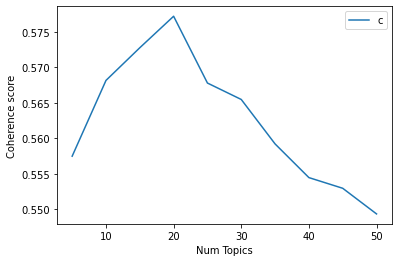

In [19]:
#Show graph
limit=55; start=5; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [25]:
# print(coherence_values)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
def calculate_best_iterations(number_of_topics, number_of_iterations):
    print(number_of_iterations)
    lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus = corpus, num_topics= number_of_topics, id2word= id2word,  iterations= number_of_iterations)
    coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    iterations.append(number_of_iterations)
    iteration_based_coherence_values.append(coherence_model_ldamallet.get_coherence())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


500
1000
1500
2000
2500
3000


ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

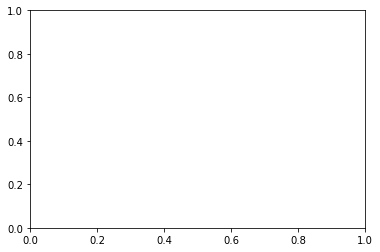

In [21]:
iterations = []
iteration_based_coherence_values = []

for i in [500,1000,1500,2000,2500, 3000]:
    calculate_best_iterations(20, i)

#Show graph
limit=3000; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, iteration_based_coherence_values)
plt.xlabel("Num of iterations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [22]:
for i in iteration_based_coherence_values:
    print(i)

0.586330699192412
0.5800092863630468
0.5807097258429396
0.5863585326778845
0.5745063479948731
0.5859968234743633


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

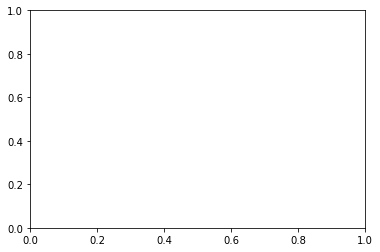

In [19]:
#Show graph
limit=3000; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, iteration_based_coherence_values)
plt.xlabel("Num of iterations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [24]:
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=15, id2word=id2word, iterations=2000, alpha=5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
#print topics

#print(lda_mallet.show_topics(num_topics=-1, num_words=25, formatted=False))
topic_number = []
topics = []

for i in lda_mallet.show_topics(num_topics=50, num_words=10, formatted=False):
    value_map_keyword = {}
    value_list = []
    key_words_list = []
    for j in i[1]:
        value_map_keyword[j[1]] = j[0]
        value_list.append(j[1])
        key_words_list.append(j[0])
   
    topic_number.append(i[0]+1)
    topics.append(',  '.join(map(str, key_words_list)))
    
topic_dataframe = pd.DataFrame({'Topic-Number': topic_number, 'Keywords': topics})
topic_dataframe.to_excel("D:/so-data/final-data-september-framework/xamarin_topic_keywords.xlsx")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
###################################
# topic development
###################################

def format_topics_sentences(ldamodel=lda_mallet, corpus=corpus, texts=data_lemmatized, title=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    contents2 = pd.Series(title)
    sent_topics_df = pd.concat([sent_topics_df, contents2, contents], axis=1)
    return(sent_topics_df)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_mallet, corpus=corpus, texts=body, title=titles)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
#print(df_topic_sents_keywords)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'title', 'texts']
df_dominant_topic.to_excel("D:/so-data/final-data-september-framework/xamarin_final_topics.xlsx")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
